In [106]:
import re
import pandas as pd
# from nltk.stem.porter import PorterStemmer
# from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#import pickle
import pickle
import numpy as np
#import tensorflow as tf
# from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [107]:
%run functions.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
df = pd.read_csv('/Users/mohsen/Downloads/FullDataset.csv', encoding='utf-8')

In [109]:
df['title_text'] = df['title_text'].apply(preprocessor)
df['title_text'] = df['title_text'].apply(remove_stopwords)

In [110]:
df['title_text']=df['title_text'].apply(stemming2)

In [111]:
X = df['title_text'].tolist()
y = df['label'].values

In [112]:
indices = np.arange(df.shape[0])
np.random.seed(0) 
np.random.shuffle(indices)
VALIDATION_SPLIT=0.3
num_vali_samples = int(VALIDATION_SPLIT*df.shape[0])

In [113]:
train_idx = indices[:-num_vali_samples]
test_idx = indices[-num_vali_samples:]

In [114]:
X_ = np.array(X)
X_train = X_[train_idx]
X_test = X_[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

In [115]:
X_train.shape

(3559,)

In [116]:
# # Make training and test sets 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [117]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [118]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [119]:
with open('pac_tfidf.pk', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f, protocol=2)

In [120]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
# Print the head of count_df
print(count_df.head())

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
# Print the head of tfidf_df
#print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
#print(difference)

# Check whether the DataFrames are equal
#print(count_df.equals(tfidf_df))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   aaa  aao  aap  aarhu  aaron  ab  ababa  abandon  abat  abattoir  ...  zs  \
0    0    0    0      0      0   0      0        0     0         0  ...   0   
1    0    0    0      0      0   0      0        0     0         0  ...   0   
2    0    0    0      0      0   0      0        0     0         0  ...   0   
3    0    0    0      0      0   0      0        0     0         0  ...   0   
4    0    0    0      0      0   0      0        0     0         0  ...   0   

   zte  zucker  zuckerberg  zukerberg  zurich  zvezda  zxc  zygmunt  zyphr  
0    0       0           0          0       0       0    0        0      0  
1    0       0           0          0       0       0    0        0      0  
2    0       0           0          0       0       0    0        0      0  
3    0       0           0          0       0       0    0        0      0  
4    0       0           0          0       0       0    0        0      0  

[5 rows x 21547 columns]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [121]:
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
linear_clf = PassiveAggressiveClassifier(C=5, max_iter=300)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = sklearn.metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.919


In [123]:
fake_news_PAC = open('fake_news_PAC.sav', 'wb')
pickle.dump(linear_clf, fake_news_PAC, protocol=2)
fake_news_PAC.close()

[[ 358   68]
 [  56 1042]]


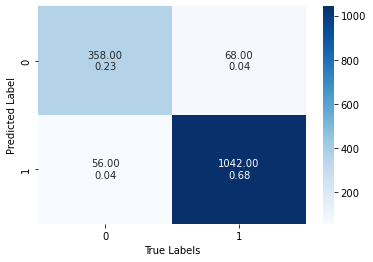

In [124]:
mat = confusion_matrix(y_test, pred)
print(mat)
group_counts = ["{:.2f}".format(value) for value in mat.flatten()]
group_percentages = ["{:.2f}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')
plt.xlabel("True Labels")
plt.ylabel("Predicted Label")
plt.show()

In [125]:
print("---Test Set Results---")
print("Accuracy with PAC:{}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

---Test Set Results---
Accuracy with PAC:0.9186351706036745
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       426
           1       0.94      0.95      0.94      1098

    accuracy                           0.92      1524
   macro avg       0.90      0.89      0.90      1524
weighted avg       0.92      0.92      0.92      1524



In [126]:
tf = pickle.load(open('pac_tfidf.pk','rb'))
filename = 'fake_news_PAC.sav'
saved_clf = pickle.load(open(filename,'rb'))

In [127]:
test="covid is not like the flu"

In [128]:
t = preprocessor(test)
t = stemming2(t)
tfidf_Newtest=tf.transform([t])
pred2 = saved_clf.predict(tfidf_Newtest)
pred2

array([0])